In [1]:
from utils import parse_trajectory

file_path = "../test/traj.out"
traj_df = parse_trajectory(file_path)

In [ ]:
traj_df.head()

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

# Constants
bins = 100  # Number of bins for RDF
r_max = 10.0  # Maximum distance for RDF computation (can be adjusted)


# Compute RDF
def compute_rdf(positions, box, bins, r_max):
    """
    Computes the radial distribution function (RDF).

    Args:
        positions: Nx3 array of particle positions.
        box: 3-element array of box dimensions [Lx, Ly, Lz].
        bins: Number of bins for the RDF.
        r_max: Maximum distance for RDF.

    Returns:
        r: Array of bin centers.
        g_r: Radial distribution function values.
    """
    # Compute pairwise distances
    distances = pdist(positions)
    distances = distances[distances < r_max]  # Ignore distances greater than r_max

    # Create histogram of distances
    hist, edges = np.histogram(distances, bins=bins, range=(0, r_max), density=False)

    # Bin centers
    r = 0.5 * (edges[:-1] + edges[1:])

    # Normalize by volume of spherical shells and particle density
    bin_width = edges[1] - edges[0]
    shell_volumes = 4 / 3 * np.pi * (edges[1:] ** 3 - edges[:-1] ** 3)
    number_density = len(positions) / np.prod(box)  # Particles per unit volume
    g_r = hist / (shell_volumes * number_density * len(positions))

    return r, g_r


# Analyze the trajectory data
def analyze_rdf(traj_df, timestep, bins, r_max):
    """
    Analyzes the RDF for a specific timestep from the trajectory data.

    Args:
        traj_df: Parsed trajectory DataFrame.
        timestep: Specific timestep to analyze.
        bins: Number of bins for the RDF.
        r_max: Maximum distance for RDF.
    """
    # Filter data for the given timestep
    timestep_data = traj_df[traj_df["timestep"] == timestep]
    positions = timestep_data[["x", "y", "z"]].values
    box = [
        21.491398636470841,
        37.224194364083985,
        0.21491398636470842,
    ]  # Box dimensions from traj.out

    # Compute RDF
    r, g_r = compute_rdf(positions, box, bins, r_max)

    # Plot RDF
    plt.plot(r, g_r, label=f"Timestep {timestep}")
    plt.xlabel("Distance r", fontsize=14)
    plt.ylabel("Radial Distribution Function g(r)", fontsize=14)
    plt.title("Radial Distribution Function (RDF)", fontsize=16)
    plt.grid(alpha=0.4)
    plt.legend(fontsize=12)
    plt.tight_layout()


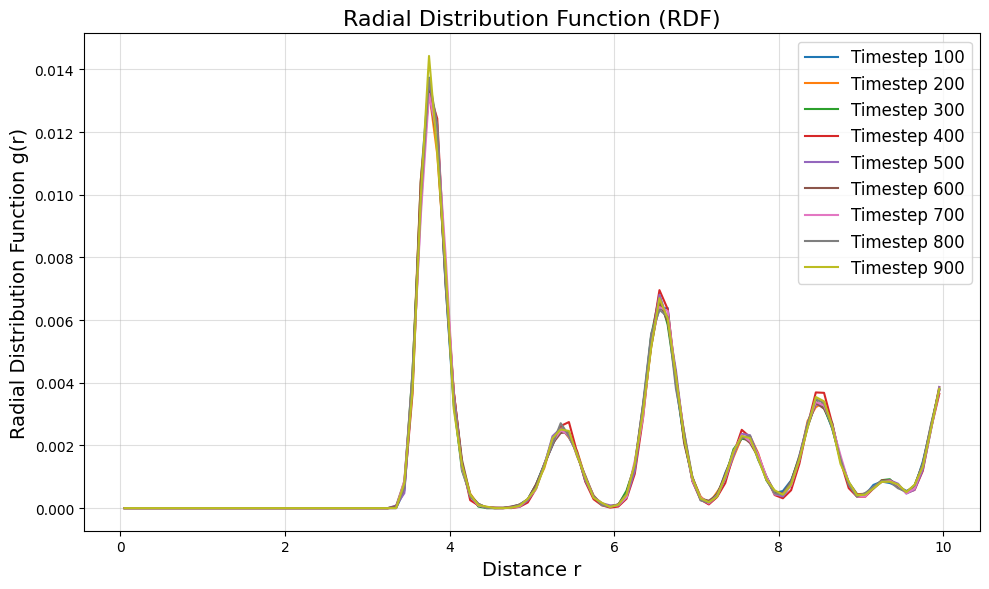

In [17]:
# Specify timestep to analyze
timesteps = [100, 200, 300, 400, 500, 600, 700, 800, 900]

plt.figure(figsize=(10, 6))
for timestep in timesteps:
    analyze_rdf(traj_df, timestep, bins, r_max)
plt.savefig('rdf.png', dpi=200, bbox_inches='tight')
plt.show()
